# 1. Priprema i vizualizacija podataka

In [223]:
import pandas as pd
import numpy as np

Najprije ćemo učitati skup podataka.

In [224]:
df = pd.read_csv('data/wdbc.data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Zatim ćemo imenovati stupce prema opisu dobivenom od izvora podataka.

Svaki redak predstavlja podatke o jednoj digitalnoj slici FNA dojke.

Prva dva stupca su ID i konačna dijagnoza.

Postoji deset realnih značajki na kojima se bazira ovaj skup podataka, čiji su nazivi spremljeni u `rv_features`. Za svaki od redaka su za svaku od tih deset značajki izvučene tri vrijednosti: srednja vrijednost, standardna pogreška i "najgora" vrijednost. Najgora vrijednost je izračunata kao srednja vrijednost tri najveće vrijednosti. Time dobivamo 30 realnih značajki, odnosno ukupno 32 stupca.

In [225]:
rv_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
feature_groups = ['mean', 'se', 'worst']
columns = ['id', 'diagnosis']
for ft_grp in feature_groups:
  for val in rv_features:
    columns.append(val + '_' + ft_grp)
df.columns = columns
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Pogledajmo osnovne informacije o skupu podataka, poput distribucije klasa.

In [226]:
class_dist = df['diagnosis'].value_counts()

num_total = len(df.index)
num_benign = class_dist[0]
num_malignant = class_dist[1]
print("Class distribution:")
print("Benign: \t", num_benign, "(" + str(np.around(100 * num_benign / num_total, decimals=2)) + "%)")
print("Malignant: \t", num_malignant, "(" + str(np.around(100 * num_malignant / num_total, decimals=2)) + "%)")

Class distribution:
Benign: 	 357 (62.74%)
Malignant: 	 212 (37.26%)


## Nedostajuće i stršeće vrijednosti

U ovom koraku ćemo provjeriti ima li u skupu nedostajućih ili stršećih vrijednosti. Za nedostajuće vrijednosti je odgovor vrlo jednostavan, jer i unaprijed znamo da nema takvih vrijednosti u ovom skupu podataka. Međutim, za stršeće vrijednosti ćemo morati napraviti malo detaljniju analizu.

In [227]:
pd.set_option('display.max_columns', 50)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Iz dobivenih podataka o srednjim vrijednostima i standardnim devijacijama odokativnim z-testom vidimo da praktički svaki od stupaca sadrži stršeće vrijednosti. To znači da ćemo im svakako morati posvetiti pažnju u nastavku.

## Vizualizacija značajki

Pošto imamo samo jednu kategoričku značajku (dijagnoza), koja će nam ujedno služi i kao oznaka kasnije, histogrami se nameću kao vrlo prikladna vizualizacija za preostale realne značajke. Ovdje ćemo kratko razmotriti distribucije nekih značajki.

Najprije ćemo pogledati distribucije značajki koje predstavljaju srednje vrijednosti, odnosno počinju s `mean_`. Pošto su sve od vrijednosti zapravo izračunate srednje vrijednosti, očekivali bismo normalne razdiobe za ovakve tipove značajki. Vidimo da značajke poput `mean_radius`, `mean_texture`, `mean_smoothness` i `mean_symmetry` otprilike imaju poznati zvonolik oblik kakav ima normalna distribucija. S druge strane, značajke `mean_concavity` i `mean_concave_points` imaju distribucije čiji su vrhovi (eng. mode) kod nižih vrijednosti na lijevoj strani histograma.

Dodatno, primjećujemo i nekolicinu značajki na repovima distribucije, što upućuje na to da su to stršeće vrijednosti.

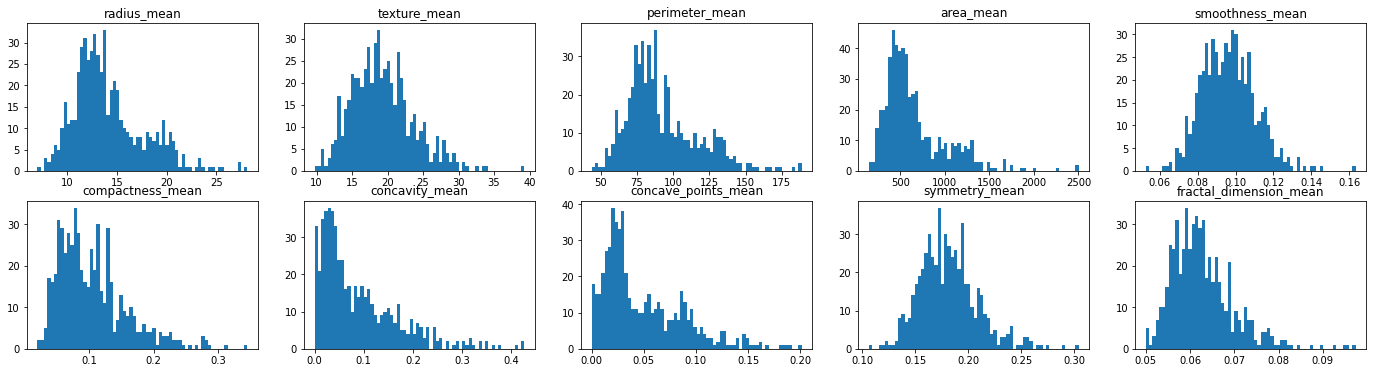

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=[24, 6])
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title(columns[i+2])
  plt.hist(df[columns[i+2]], bins=64);

Za kraj ćemo pogledati distribucije značajki koje predstavljaju najgore vrijednosti, odnosno one koje počinju s `worst_`. Ove su distribucije vrlo sličnih oblika prethodno analiziranim distribucijama za `mean_` značajke. Ipak, može se vidjeti da su u usporedbi s njima "teže" na desnom kraju distribucije. Ovo je za očekivati zbog načina na koji su `worst_` značajku i dobivene.

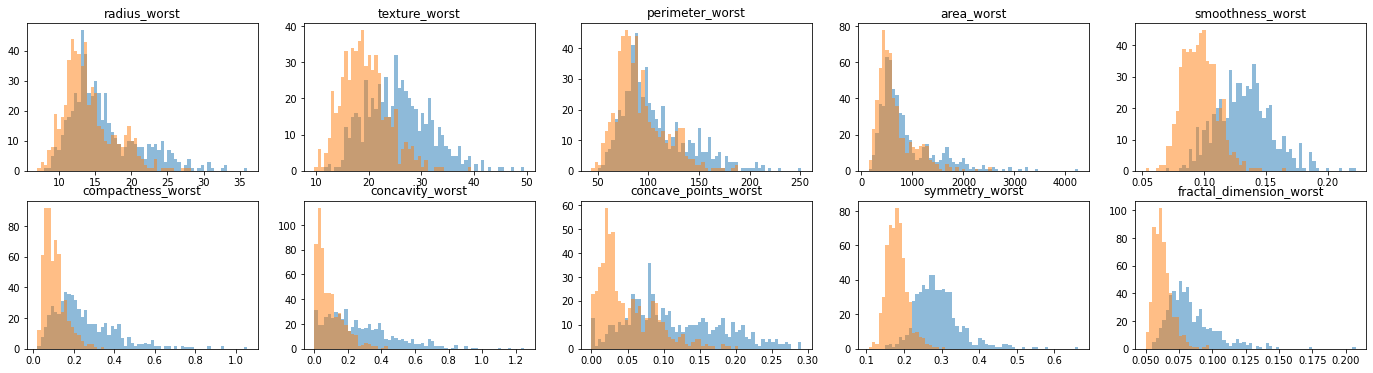

In [229]:
plt.figure(figsize=[24, 6])
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title(columns[i+22])
  x_max = np.amax([df[columns[i+22]].max(), df[columns[i+2]].max()])
  x_min = np.amin([df[columns[i+22]].min(), df[columns[i+2]].min()])
  bins = np.linspace(x_min, x_max, 64)
  plt.hist(df[columns[i+22]], alpha=0.5, bins=bins);
  plt.hist(df[columns[i+2]], alpha=0.5, bins=bins);

# 2. Replikacija rezultata

Razdvojit ćemo skup podataka u skup za učenje i skup za provjeru. U članku je korištena podjela 75-25.

In [230]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = pd.DataFrame(list(map(lambda x: 1 if x == 'M' else 0, df['diagnosis'])), columns=['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Odabir značajki

U radu su izbačene tri značajke, poimence `fractal_dimension_mean`, `texture_se`, te `symmetry_se` zbog male negativne korelacije s dijagnozom. Izbacujemo nisko korelirane značajke u nadi da ćemo time povećati točnost predikcije.

In [231]:
from sklearn.preprocessing import StandardScaler
irrelevant_features = ['fractal_dimension_mean', 'texture_se', 'symmetry_se']

X_train.drop(irrelevant_features, axis=1, inplace=True)
X_test.drop(irrelevant_features, axis=1, inplace=True)

scaler = StandardScaler()

## Treniranje i testiranje modela

Kao i u oglednom članku, trenirat ćemo i testirati šest različitih modela strojnog učenja. Konkretno, to će biti logistička regresija, algoritam k-najbližih susjeda, stablo odluke, naivni Bayesov klasifikator, random forest klasifikator te stroj potpornih vektora. Za provjeru točnosti svih modela koristit ćemo funkciju `accuracy_score` koja računa točnost kao omjer broja točno klasificiranih primjera i ukupnog broja svih primjera.

### Logistička regresija

Koristit ćemo L2 regulariziranu logističku regresiju, tako da ćemo značajke morati i skalirati. Za to ćemo koristiti razred `StandardScaler`.

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(scaler.fit_transform(X_train), y_train)
logreg_train_acc = logreg.score(scaler.fit_transform(X_train), y_train)
logreg_test_acc = logreg.score(scaler.fit_transform(X_test), y_test)

print("Training accuracy:", logreg_train_acc)
print("Testing accuracy:", logreg_test_acc)

Training accuracy: 0.9882629107981221
Testing accuracy: 0.958041958041958


### Algoritam k-najbližih susjeda

Kod algoritma k-najbližih susjeda ćemo također skalirati značajke. Parametar k ćemo optimirati unakrsnom provjerom, dok za sve ostale parametre koristimo preddefinirane vrijednosti.

In [233]:
from sklearn.neighbors import KNeighborsClassifier

max_knn_test_acc = 0
best_k = 0
best_knn_train_acc = 0
for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(scaler.fit_transform(X_train), y_train)
  knn_acc_test = knn.score(scaler.fit_transform(X_test), y_test)
  if knn_acc_test > max_knn_test_acc:
    max_knn_test_acc = knn_acc_test
    best_k = k
    best_knn_train_acc = knn.score(scaler.fit_transform(X_train), y_train)

print("Best k:", best_k)
print("Training accuracy:", best_knn_train_acc)
print("Testing accuracy:", max_knn_test_acc)

Best k: 5
Training accuracy: 0.9788732394366197
Testing accuracy: 0.972027972027972


## Stablo odluke

Stablo odluke ne zahtjeva skaliranje značajki jer model nije osjetljiv na varijance u značajkama. Usto, nećemo mijenjati preddefinirane parametre modela poput maksimalne dubine ili kriterija podjele.

In [234]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_train_acc = dtree.score(X_train, y_train)
dtree_test_acc = dtree.score(X_test, y_test)

print("Training accuracy:", dtree_train_acc)
print("Testing accuracy:", dtree_test_acc)

Training accuracy: 1.0
Testing accuracy: 0.9300699300699301


### Naivni Bayesov klasifikator

In [235]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_train_acc = gnb.score(X_train, y_train)
gnb_test_acc = gnb.score(X_test, y_test)

print("Training accuracy:", gnb_train_acc)
print("Testing accuracy:", gnb_test_acc)

Training accuracy: 0.6197183098591549
Testing accuracy: 0.6433566433566433


### Random forest klasifikator

In [236]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_train_acc = rfc.score(X_train, y_train)
rfc_test_acc = rfc.score(X_test, y_test)

print("Training accuracy:", rfc_train_acc)
print("Testing accuracy:", rfc_test_acc)

Training accuracy: 1.0
Testing accuracy: 0.9440559440559441


### Stroj s potpornim vektorima

Stroj s potpornim vektorima je podosta osjetljiv na promjene hiperparametra C, kao i na odabir jezgrene funkcije. Stoga ćemo za ovaj model provesti potreban proces odabira hiperparametara, a pošto je SVM osjetljiv i na neskalirane značajke istovremeno ćemo obaviti i skaliranje značajki.

In [237]:
from sklearn.svm import SVC

max_svc_train_acc = 0
max_svc_test_acc = 0
best_kernel = None
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  max_test_acc = 0
  best_train_acc = 0
  best_C = None
  for c in range(-10, 10):
    C = pow(10, c)
    svc = SVC(kernel=kernel, C=C)
    svc.fit(scaler.fit_transform(X_train), y_train)
    svc_test_acc = svc.score(scaler.fit_transform(X_test), y_test)
    if svc_test_acc > max_test_acc:
      max_test_acc = svc_test_acc
      best_train_acc = svc.score(scaler.fit_transform(X_train), y_train)
      best_C = C
      if max_test_acc > max_svc_test_acc:
        max_svc_test_acc = max_test_acc
        max_svc_train_acc = best_train_acc
        best_kernel = kernel
  print("Training accuracy for", kernel, ":", best_train_acc)
  print("Testing accuracy for", kernel, ":", max_test_acc)

Training accuracy for linear : 0.9835680751173709
Testing accuracy for linear : 0.965034965034965
Training accuracy for poly : 0.9741784037558685
Testing accuracy for poly : 0.951048951048951
Training accuracy for rbf : 0.9859154929577465
Testing accuracy for rbf : 0.965034965034965
Training accuracy for sigmoid : 0.9577464788732394
Testing accuracy for sigmoid : 0.951048951048951


## Prikaz rezultata

In [238]:
models = ["Logistic Regression", "KNN", "Decision Tree", "Naive Bayes", "Random Forest", "SVC"]
results_train = [logreg_train_acc, best_knn_train_acc, dtree_train_acc, gnb_train_acc, rfc_train_acc, max_svc_train_acc]
results_test = [logreg_test_acc, max_knn_test_acc, dtree_test_acc, gnb_test_acc, rfc_test_acc, max_svc_test_acc]

results_dict = dict()
for i, model in enumerate(["Logistic Regression", "KNN", "Decision Tree", "Naive Bayes", "Random Forest", "SVC"]):
  results_dict[model] = [results_train[i], results_test[i]]
results_table = pd.DataFrame(results_dict)
results_table.rename(index={0: "Training accuracy"}, inplace=True)
results_table.rename(index={1: "Testing accuracy"}, inplace=True)
print(results_table.transpose())

                     Training accuracy  Testing accuracy
Logistic Regression           0.988263          0.958042
KNN                           0.978873          0.972028
Decision Tree                 1.000000          0.930070
Naive Bayes                   0.619718          0.643357
Random Forest                 1.000000          0.944056
SVC                           0.983568          0.965035
